In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as st
import datetime

%matplotlib inline

In [2]:
# Paths to base csv files
MDA_Table_Path = os.path.join("MDA_table" + os.sep, "Master_Table_MDA.csv")
MTR_Table_Path = os.path.join("MTR_table" + os.sep, "Master_Table_MTR.csv")

In [3]:
# Create Data Frames for 
MDA_DF = pd.read_csv(MDA_Table_Path)
MTR_DF = pd.read_csv(MTR_Table_Path)

In [4]:
# Change Indexes
MDA_DF = MDA_DF.set_index("ZONA")
MTR_DF = MTR_DF.set_index("ZONA")

In [5]:
# Merge MDA and MTR Data Frames to Master_DF
Master_DF = MTR_DF.merge(MDA_DF, on=["ZONA", "SISTEMA", "FECHA", "HORA"], how="outer")

In [6]:
# Clean empty rows from Master_DF
Master_DF = Master_DF.dropna()

In [7]:
# Convert FECHA column to date format
Master_DF["FECHA"] = pd.to_datetime(Master_DF["FECHA"])

In [8]:
# Create register DF of ZONAS where there are prices equal to zero
NULLS_DF = Master_DF.loc[(Master_DF["PRECIO MTR"] == 0) | (Master_DF["PRECIO MDA"] == 0), :]
NULLS_DF["FECHA"] = pd.to_datetime(NULLS_DF["FECHA"])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Drop rows from Master_DF where PRECIO MDA or PRECIO MTR equals zero
Master_DF = Master_DF.loc[(Master_DF["PRECIO MTR"] != 0) & (Master_DF["PRECIO MDA"] != 0), :]

In [10]:
# Add P_MTR-P_MDA Column and reset index
Master_DF["P_MDA–P_MTR"] = Master_DF["PRECIO MDA"] - Master_DF["PRECIO MTR"]
Master_DF = Master_DF.reset_index()

In [11]:
# Create table with rows having negative P_MTR-P_MDA values
Negs_DF = Master_DF.loc[Master_DF["P_MDA–P_MTR"] <= 0, :]
Negs_DF["FECHA"] = pd.to_datetime(Negs_DF["FECHA"])
Negs_DF = Negs_DF.reset_index(drop=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Create table with rows having positive P_MTR-P_MDA values
Pos_DF = Master_DF.loc[Master_DF["P_MDA–P_MTR"] >= 0, :]
Pos_DF["FECHA"] = pd.to_datetime(Pos_DF["FECHA"])
Pos_DF = Pos_DF.reset_index(drop=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Count negative P_MTR-P_MDA occurencies in BCA System
BCA_Negs_DF = Negs_DF.loc[Negs_DF["SISTEMA"] == "BCA", ["ZONA", "SISTEMA"]]
BCA_Negs_DF = BCA_Negs_DF.groupby("ZONA").count()
BCA_Negs_DF = BCA_Negs_DF.rename(columns={"SISTEMA":"MDA-MTR < 0"})
BCA_Negs_DF = BCA_Negs_DF.sort_values("MDA-MTR < 0", ascending=False)
BCA_Negs_DF = BCA_Negs_DF.reset_index()

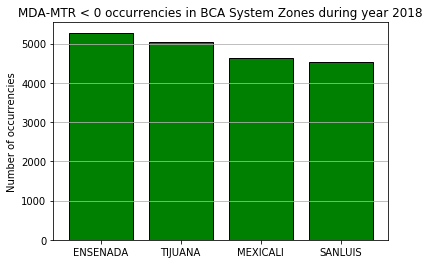

In [15]:
# Plot negative P_MTR-P_MDA occurencies in BCA System
plt.bar(BCA_Negs_DF["ZONA"], BCA_Negs_DF["MDA-MTR < 0"], edgecolor="black", color="green")
plt.title("MDA-MTR < 0 occurrencies in BCA System Zones during year 2018")
plt.ylabel("Number of occurrencies")
plt.grid(axis="y")
plt.savefig("Figures/MDA_MTR_neg_freqs_BCA.png")
plt.show()

In [19]:
# Count negative P_MTR-P_MDA occurencies in BCS System
BCS_Negs_DF = Negs_DF.loc[Negs_DF["SISTEMA"] == "BCS", ["ZONA", "SISTEMA"]]
BCS_Negs_DF = BCS_Negs_DF.groupby("ZONA").count()
BCS_Negs_DF = BCS_Negs_DF.rename(columns={"SISTEMA":"MDA-MTR < 0"})
BCS_Negs_DF = BCS_Negs_DF.sort_values("MDA-MTR < 0", ascending=False)
BCS_Negs_DF = BCS_Negs_DF.reset_index()

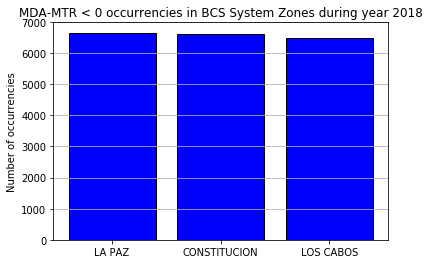

In [20]:
# Plot negative P_MTR-P_MDA occurencies in BCS System
plt.bar(BCS_Negs_DF["ZONA"], BCS_Negs_DF["MDA-MTR < 0"], edgecolor="black", color="blue")
plt.title("MDA-MTR < 0 occurrencies in BCS System Zones during year 2018")
plt.ylabel("Number of occurrencies")
plt.grid(axis="y")
plt.savefig("Figures/MDA_MTR_neg_freqs_BCS.png")
plt.show()

In [16]:
# Count negative P_MTR-P_MDA occurencies in SIN System
SIN_Negs_DF = Negs_DF.loc[Negs_DF["SISTEMA"] == "SIN", ["ZONA", "SISTEMA"]]
SIN_Negs_DF = SIN_Negs_DF.groupby("ZONA").count()
SIN_Negs_DF = SIN_Negs_DF.rename(columns={"SISTEMA":"MDA-MTR < 0"})
SIN_Negs_DF = SIN_Negs_DF.sort_values("MDA-MTR < 0", ascending=False)
SIN_Negs_DF = SIN_Negs_DF.reset_index()

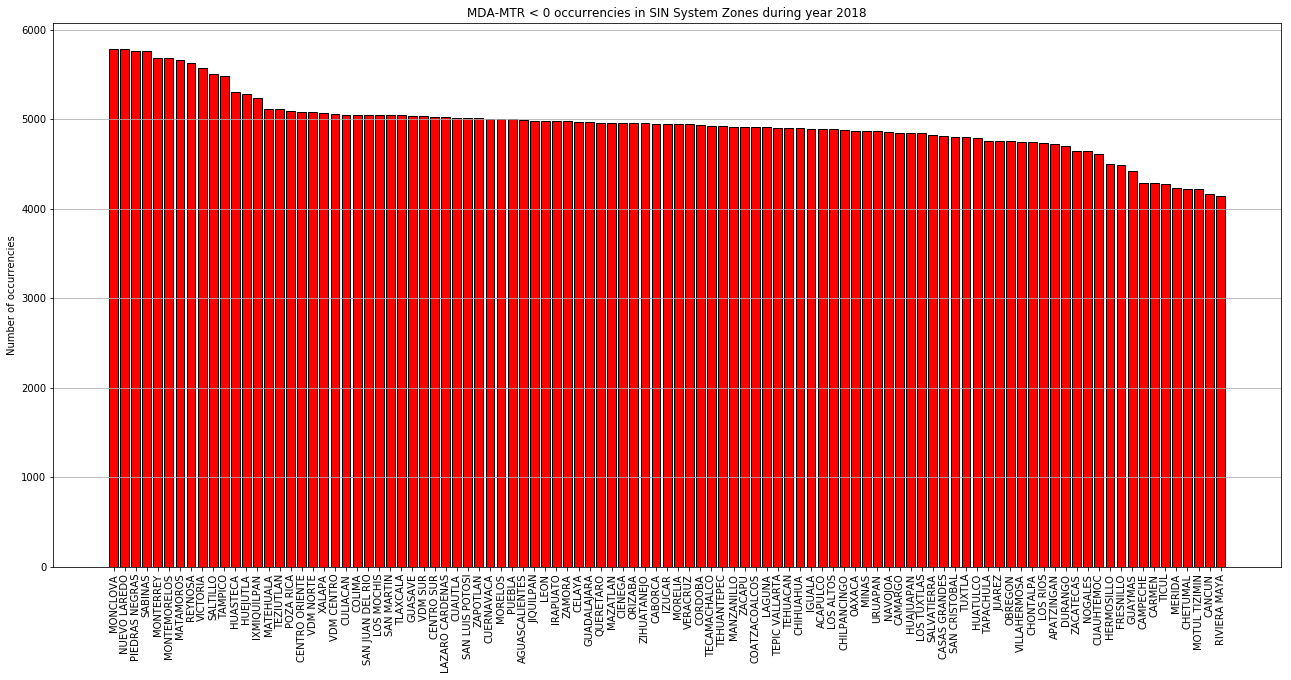

In [17]:
# Plot negative P_MTR-P_MDA occurencies in SIN System
plt.figure(figsize=(22,10))
plt.bar(SIN_Negs_DF["ZONA"], SIN_Negs_DF["MDA-MTR < 0"], edgecolor="black", color="red", align="center")
plt.title("MDA-MTR < 0 occurrencies in SIN System Zones during year 2018")
plt.xticks(rotation="vertical")
plt.ylabel("Number of occurrencies")
plt.grid(axis="y")
plt.savefig("Figures/MDA_MTR_neg_freqs_SIN.png")
plt.show()

Month to retrieve [01-12]: 03
Day to retrieve [01-31]: 03
Zone to retrieve: ensenada


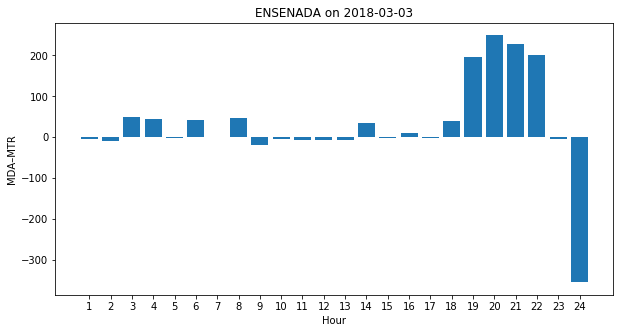

In [21]:
# Tool for displaying performance of a single day for a given zone
retrieve_month = input("Month to retrieve [01-12]: ")  
retrieve_day = input("Day to retrieve [01-31]: ")
retrieve_zone =  input("Zone to retrieve: ").upper()

query_DF = Master_DF.loc[(Master_DF["FECHA"] == f"2018-{retrieve_month}-{retrieve_day}") & 
                            (Master_DF["ZONA"] == f"{retrieve_zone}"), :]
plt.figure(figsize=(10,5))
plt.bar(query_DF["HORA"], query_DF["P_MDA–P_MTR"])
plt.xticks([x for x in range(1,25)])
plt.title(f"{retrieve_zone} on 2018-{retrieve_month}-{retrieve_day}")
plt.xlabel("Hour")
plt.ylabel("MDA–MTR")
plt.show()

In [22]:
# Create DF with the maximum differentials (P_MDA–P_MTR) per day for every zone for the BCA System
Max_DF_BCA = Pos_DF.loc[Pos_DF["SISTEMA"] == "BCA", ["ZONA", "FECHA", "HORA", "P_MDA–P_MTR"]]
Max_DF_BCA = Max_DF_BCA.groupby(["ZONA", "FECHA"]).max()
Max_DF_BCA = Max_DF_BCA.reset_index()
Max_DF_BCA["FECHA"] = Max_DF_BCA["FECHA"].astype(str)

In [23]:
# Create DF with the maximum differentials (P_MDA–P_MTR) per day for every zone for the BCS System
Max_DF_BCS = Pos_DF.loc[Pos_DF["SISTEMA"] == "BCS", ["ZONA", "FECHA", "HORA", "P_MDA–P_MTR"]]
Max_DF_BCS = Max_DF_BCS.groupby(["ZONA", "FECHA"]).max()
Max_DF_BCS = Max_DF_BCS.reset_index()
Max_DF_BCS["FECHA"] = Max_DF_BCS["FECHA"].astype(str)

In [24]:
# Create DF with the maximum differentials (P_MDA–P_MTR) per day for every zone for the SIN System
Max_DF_SIN = Pos_DF.loc[Pos_DF["SISTEMA"] == "SIN", ["ZONA", "FECHA", "HORA", "P_MDA–P_MTR"]]
Max_DF_SIN = Max_DF_SIN.groupby(["ZONA", "FECHA"]).max()
Max_DF_SIN = Max_DF_SIN.reset_index()
Max_DF_SIN["FECHA"] = Max_DF_SIN["FECHA"].astype(str)

In [25]:
# Create DF with the minimum differentials (P_MDA–P_MTR) per day for every zone for the BCA System
Min_DF_BCA = Negs_DF.loc[Negs_DF["SISTEMA"] == "BCA", ["ZONA", "FECHA", "HORA", "P_MDA–P_MTR"]]
Min_DF_BCA = Min_DF_BCA.groupby(["ZONA", "FECHA"]).max()
Min_DF_BCA = Min_DF_BCA.reset_index()
Min_DF_BCA["FECHA"] = Min_DF_BCA["FECHA"].astype(str)

In [26]:
# Create DF with the minimum differentials (P_MDA–P_MTR) per day for every zone for the BCS System
Min_DF_BCS = Negs_DF.loc[Negs_DF["SISTEMA"] == "BCS", ["ZONA", "FECHA", "HORA", "P_MDA–P_MTR"]]
Min_DF_BCS = Min_DF_BCS.groupby(["ZONA", "FECHA"]).max()
Min_DF_BCS = Min_DF_BCS.reset_index()
Min_DF_BCS["FECHA"] = Min_DF_BCS["FECHA"].astype(str)

In [27]:
# Create DF with the minimum differentials (P_MDA–P_MTR) per day for every zone for the SIN System
Min_DF_SIN = Negs_DF.loc[Negs_DF["SISTEMA"] == "SIN", ["ZONA", "FECHA", "HORA", "P_MDA–P_MTR"]]
Min_DF_SIN = Min_DF_SIN.groupby(["ZONA", "FECHA"]).max()
Min_DF_SIN = Min_DF_SIN.reset_index()
Min_DF_SIN["FECHA"] = Min_DF_SIN["FECHA"].astype(str)

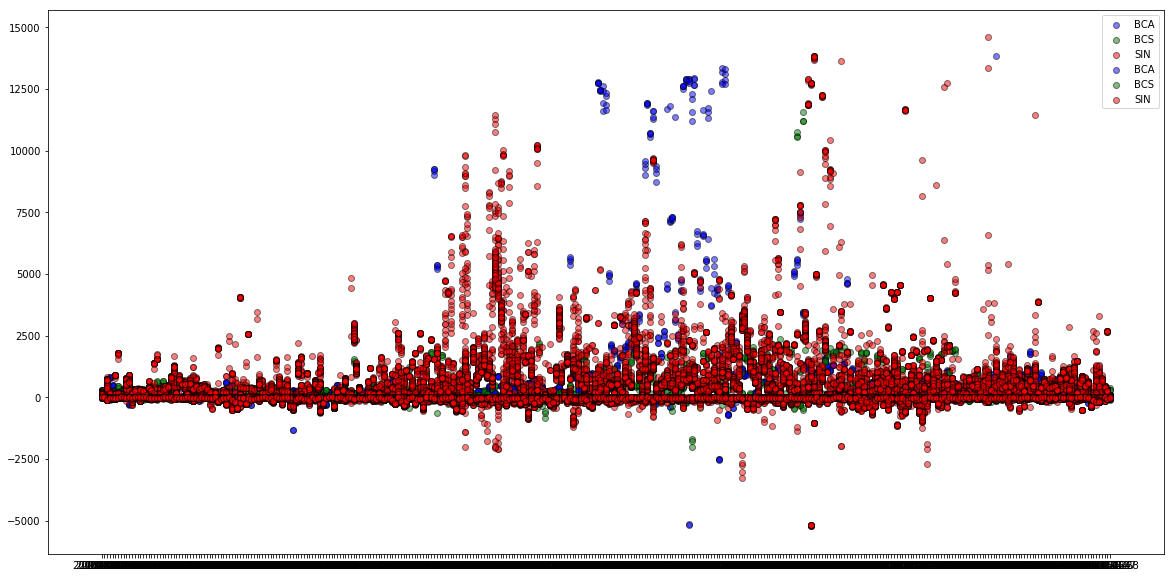

In [29]:
# Create data visualization with the last DFs
plt.figure(figsize=(20,10))
plt.scatter(Max_DF_BCA["FECHA"], Max_DF_BCA["P_MDA–P_MTR"], edgecolor="black", alpha=0.5, label="BCA", facecolor="blue")
plt.scatter(Max_DF_BCS["FECHA"], Max_DF_BCS["P_MDA–P_MTR"], edgecolor="black", alpha=0.5, label="BCS", facecolor="green")
plt.scatter(Max_DF_SIN["FECHA"], Max_DF_SIN["P_MDA–P_MTR"], edgecolor="black", alpha=0.5, label="SIN", facecolor="red")
plt.scatter(Min_DF_BCA["FECHA"], Min_DF_BCA["P_MDA–P_MTR"], edgecolor="black", alpha=0.5, label="BCA", facecolor="blue")
plt.scatter(Min_DF_BCS["FECHA"], Min_DF_BCS["P_MDA–P_MTR"], edgecolor="black", alpha=0.5, label="BCS", facecolor="green")
plt.scatter(Min_DF_SIN["FECHA"], Min_DF_SIN["P_MDA–P_MTR"], edgecolor="black", alpha=0.5, label="SIN", facecolor="red")
plt.legend()
plt.savefig("Max_Mins.png")
plt.show()